# <font color='darkblue'>*Marina Napoleão - EBAC*</font>
## <font color='darkblue'>Projeto Análise  - A segunda etapa da Pré Modelagem</font>

# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

Estou com duvida sobre a base de dados que se deve usar nesse exercicio. A primeira atividade pede para salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
#Seu código de importação aqui
df = pd.read_csv('CHURN_TELECON_MOD15_ATIVIDADE.csv', delimiter=',')

df.head(10)

,ID_Cliente,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Sevico_Internet,Sevico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-vhveg,female,False,yes,no,1,no,dsl,no,no,no,month-to-month,electronic check,29.85,29.85,no
1,5575-gnvde,male,False,no,no,34,yes,dsl,yes,no,no,one year,mailed check,56.95,1889.50,no
2,3668-qpybk,male,False,no,no,2,yes,dsl,yes,no,no,month-to-month,mailed check,53.85,108.15,yes
3,7795-cfocw,male,False,no,no,45,no,dsl,yes,yes,no,one year,bank transfer (automatic),71.45,1840.75,no
4,8191-xwszg,female,False,no,no,52,yes,no,no internet service,no internet service,no internet service,one year,mailed check,71.45,1022.95,no
5,9959-wofkt,male,False,no,yes,71,yes,fiber optic,yes,no,yes,two year,bank transfer (automatic),71.45,7382.25,no
6,4190-mfluw,female,False,yes,yes,10,yes,dsl,no,yes,no,month-to-month,credit card (automatic),71.45,528.35,yes
7,4183-myfrb,female,False,no,no,21,yes,fiber optic,no,no,no,month-to-month,electronic check,71.45,1862.90,no
8,8779-qrdmv,male,True,no,no,1,no,dsl,no,no,no,month-to-month,electronic check,71.45,39.65,yes
9,1680-vdcww,male,False,yes,no,12,yes,no,no internet service,no internet service,no internet service,one year,bank transfer (automatic),71.45,202.25,no


In [3]:
a = df.info()
b = df.isnull().sum()

print( a, '\n número de valores nulos em cada coluna: \n', b)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Cliente          2488 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2488 non-null   bool   
 3   Casado              2488 non-null   object 
 4   Dependentes         2488 non-null   object 
 5   Tempo_como_Cliente  2488 non-null   int64  
 6   Servico_Telefone    2488 non-null   object 
 7   Sevico_Internet     2488 non-null   object 
 8   Sevico_Seguranca    2488 non-null   object 
 9   Suporte_Tecnico     2488 non-null   object 
 10  StreamingTV         2488 non-null   object 
 11  Tipo_Contrato       2488 non-null   object 
 12  Metodo_Pagamento    2488 non-null   object 
 13  Pagamento_Mensal    2488 non-null   float64
 14  Total_Pago          2488 non-null   float64
 15  Churn               2488 non-null   object 
dtypes: boo

-------

# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [4]:
#A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

df.describe()

,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000
mean,32.352090,66.342564,2290.087178
std,24.636885,28.051718,2264.585643
min,0.000000,18.400000,18.800000
25%,8.000000,45.400000,402.337500
50%,29.000000,71.450000,1402.900000
75%,56.000000,87.712500,3867.162500
max,72.000000,118.650000,8564.750000


* A mediana (71,45) é maior que a média (66,34) sugerindo que a clientes com valores muito baixos.
* O pagamento mensal tem uma grande diferença entre o seu valor minimo(18,40) e maximo(118,65).
* O tempo como cliente apresenta que a maioria dos clientes estão a menos de 3 anos e clientes com tempo 0 o que pode indicar novos cadastros ou erro nos registros.

------------


 0.20096463022508038 
 0.0 
 0.0


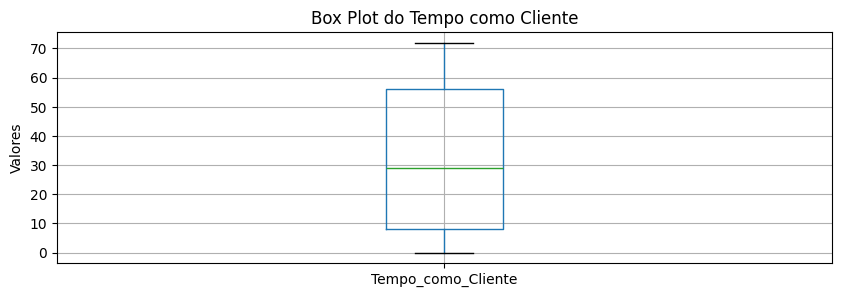

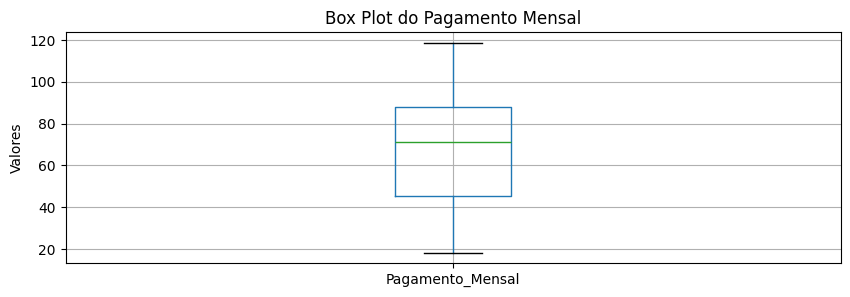

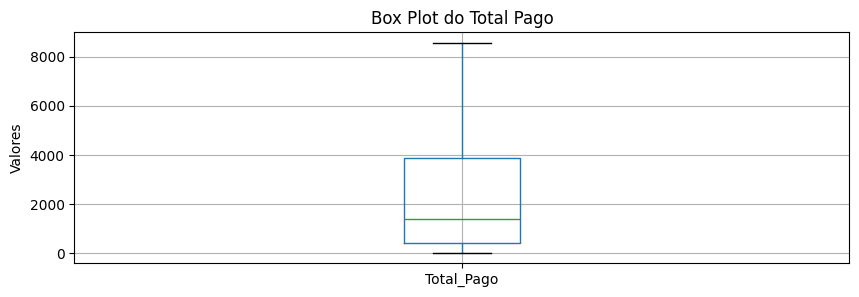

In [5]:
#B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

#média em porcentagem
c = (df['Tempo_como_Cliente'] == 0).mean() * 100
d = (df['Pagamento_Mensal'] == 0).mean() * 100
e = (df['Total_Pago'] == 0).mean() * 100

print('\n', c, '\n', d, '\n', e)

#grafico boxplot do Tempo como Cliente
plt.figure(figsize=(10, 3))
df.boxplot(column='Tempo_como_Cliente')
plt.title('Box Plot do Tempo como Cliente')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do Pagamento Mensal
plt.figure(figsize=(10, 3))
df.boxplot(column='Pagamento_Mensal')
plt.title('Box Plot do Pagamento Mensal')
plt.ylabel('Valores')
plt.show()

#grafico boxplot do Total Pago
plt.figure(figsize=(10, 3))
df.boxplot(column='Total_Pago')
plt.title('Box Plot do Total Pago')
plt.ylabel('Valores')
plt.show()

In [6]:
#clientes com tempo 0
(df['Tempo_como_Cliente'] == 0).sum()

5

* Na coluna 'Tempo_como_Cliente', os valores estão dentro de faixa mais estavel, não há outliers visiveis no gráfico.
* Na coluna 'Pagamento_Mensal', os dados estão distribuídos de forma razoável, sem outliers visíveis também.
* Na coluna 'Total_Pago', existe uma alta variabilidade nos valores de Total_Pago, com casos extremos, mas não há outliers explícitos segundo o boxplot padrão.

-------


 Q1: 402.3375 
 Q3 3867.1625 
 IQR: 3464.825
Limite inferior: -4794.9
Limite superior: 9064.4
mediana sem outliers: 1402.9
Total de registros sem outliers: 2488
Total de outliers: 0


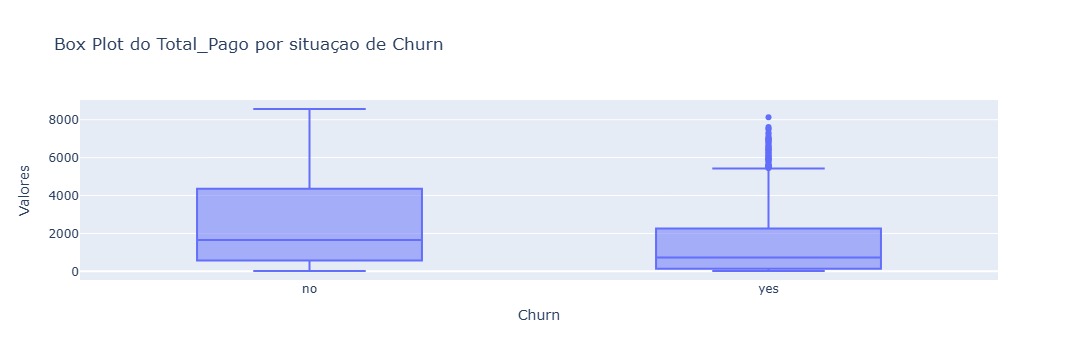

In [7]:
#C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

# Os quartis do boxplot, Total_Pago
Q1 = df['Total_Pago'].quantile(0.25)
Q3 = df['Total_Pago'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print('\n Q1:', Q1, '\n Q3', Q3, '\n IQR:', IQR)
print("Limite inferior:", limite_inferior)
print("Limite superior:", limite_superior)

df_sem_outliers = df[(df['Total_Pago'] >= limite_inferior) & (df['Total_Pago'] <= limite_superior)]
mediana_sem_outliers = df_sem_outliers['Total_Pago'].median()

print('mediana sem outliers:',mediana_sem_outliers)

print("Total de registros sem outliers:", df_sem_outliers.shape[0])
print("Total de outliers:", df.shape[0] - df_sem_outliers.shape[0])

fig = px.box(df_sem_outliers, x ='Churn', y='Total_Pago', title='Box Plot do Total_Pago por situaçao de Churn', labels={'Total_Pago': 'Valores'})
fig.show()

#fig = px.box(df, x='Churn', y='Total_Pago', title='Total Pago por Situação de Churn', labels={'Total_Pago': 'Valores'})
#fig.show()


 Q1: 8.0 
 Q3 56.0 
 IQR: 48.0
Limite inferior: -64.0
Limite superior: 128.0
mediana sem outliers: 29.0
Total de registros sem outliers: 2488
Total de outliers: 0


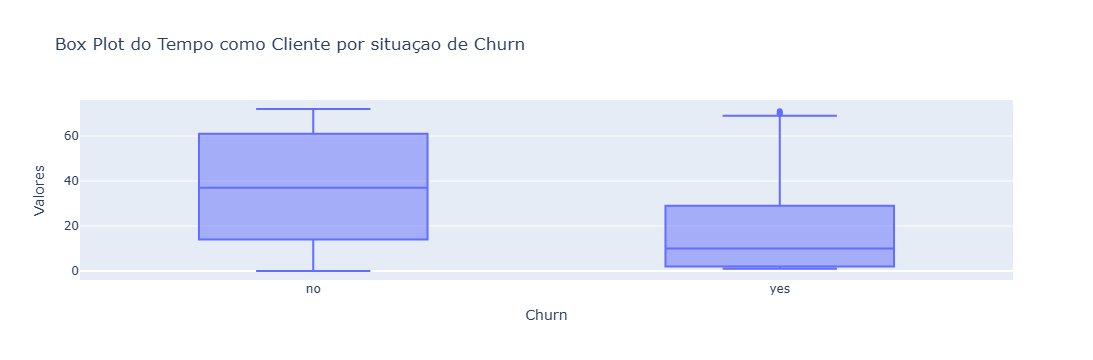

In [8]:
#C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

# Os quartis do boxplot, Tempo_como_Cliente
Q1 = df['Tempo_como_Cliente'].quantile(0.25)
Q3 = df['Tempo_como_Cliente'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print('\n Q1:', Q1, '\n Q3', Q3, '\n IQR:', IQR)
print("Limite inferior:", limite_inferior)
print("Limite superior:", limite_superior)

df_sem_outliers = df[(df['Tempo_como_Cliente'] >= limite_inferior) & (df['Tempo_como_Cliente'] <= limite_superior)]
mediana_sem_outliers = df_sem_outliers['Tempo_como_Cliente'].median()

print('mediana sem outliers:',mediana_sem_outliers)

print("Total de registros sem outliers:", df_sem_outliers.shape[0])
print("Total de outliers:", df.shape[0] - df_sem_outliers.shape[0])

fig = px.box(df_sem_outliers, x ='Churn', y='Tempo_como_Cliente', title='Box Plot do Tempo como Cliente por situaçao de Churn', labels={'Tempo_como_Cliente': 'Valores'})
fig.show()

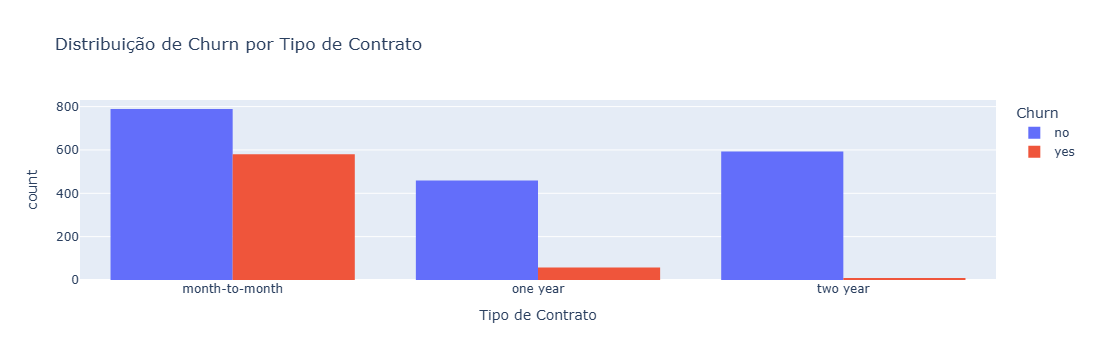

In [9]:
#C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

fig = px.histogram(df, x='Tipo_Contrato', color='Churn', barmode='group',
                   title='Distribuição de Churn por Tipo de Contrato',
                   labels={'count': 'Número de Clientes', 'Tipo_Contrato': 'Tipo de Contrato'})
fig.show()

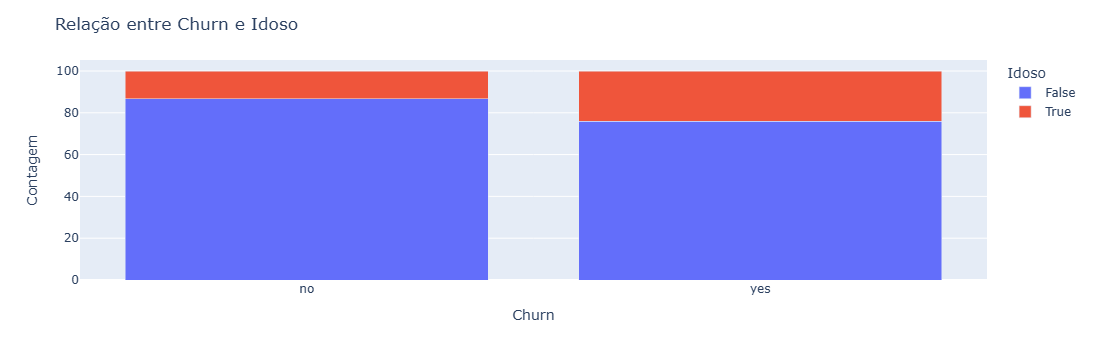

<Figure size 1000x400 with 0 Axes>

In [10]:
#C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.
df_grouped = df.groupby(['Churn', 'Idoso']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

plt.figure(figsize=(10, 4))
fig = px.bar(df_grouped, x='Churn', y='percent', color='Idoso', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Idoso': 'Idoso'})

# Layout
fig.update_layout(title='Relação entre Churn e Idoso',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Idoso')
fig.show()

* Clientes que **não cancelaram o serviço (Churn = no)** costumam ter um valor 'Total_Pago' bem mais elevado, e uma maior variação nesses valores. Já os **clientes que cancelaram (Churn = yes)** gastam menos ao longo do tempo e apresentam menor variação nos valores. Isso pode indicar que clientes mais engajados financeiramente permanecem por mais tempo, enquanto os clientes que gastam menos estão mais propensos a encerrar o serviço.

* A maior parte dos clientes está no plano mensal, e esse é justamente o grupo com maior taxa de cancelamento. Isso reforça a ideia de que os planos com prazo mais curto favorecem a rotatividade, enquanto **contratos mais longos, como os anuais (one year), contribuem para manter o cliente por mais tempo.** 

* De forma mais objetiva, clientes com **contrato 'curto prazo' (month-to-month) possuem maior probabilidade de cancelamento (Churn = yes)**.  O gráfico pode mostrar que a mediana do tempo é menor para quem teve churn.

* Por fim, a proporção de **clientes idosos (Idoso = true)** que cancelam o serviço é maior. Também podemos notar que a grande maioria dos nossos clientes não são idosos (cerca de 83,84% da nossa base).

--------

In [11]:
# D) Verifique se os dados das variáveis Booleanas são balanceados ou não

possiveis_booleanas = [col for col in df.columns if df[col].nunique() == 2]

for coluna in possiveis_booleanas:
    print('\n Variável:', coluna)
    
    contagem = df[coluna].value_counts()
    porcentagem = df[coluna].value_counts(normalize=True) * 100
    
    print("Contagem:")
    print(contagem)
    print("Porcentagem:")
    print(porcentagem.round(2))


 Variável: Genero
Contagem:
male      1269
female    1219
Name: Genero, dtype: int64
Porcentagem:
male      51.0
female    49.0
Name: Genero, dtype: float64

 Variável: Idoso
Contagem:
False    2086
True      402
Name: Idoso, dtype: int64
Porcentagem:
False    83.84
True     16.16
Name: Idoso, dtype: float64

 Variável: Casado
Contagem:
no     1262
yes    1226
Name: Casado, dtype: int64
Porcentagem:
no     50.72
yes    49.28
Name: Casado, dtype: float64

 Variável: Dependentes
Contagem:
no     1705
yes     783
Name: Dependentes, dtype: int64
Porcentagem:
no     68.53
yes    31.47
Name: Dependentes, dtype: float64

 Variável: Servico_Telefone
Contagem:
no     1568
yes     920
Name: Servico_Telefone, dtype: int64
Porcentagem:
no     63.02
yes    36.98
Name: Servico_Telefone, dtype: float64

 Variável: Churn
Contagem:
no     1841
yes     647
Name: Churn, dtype: int64
Porcentagem:
no     74.0
yes    26.0
Name: Churn, dtype: float64


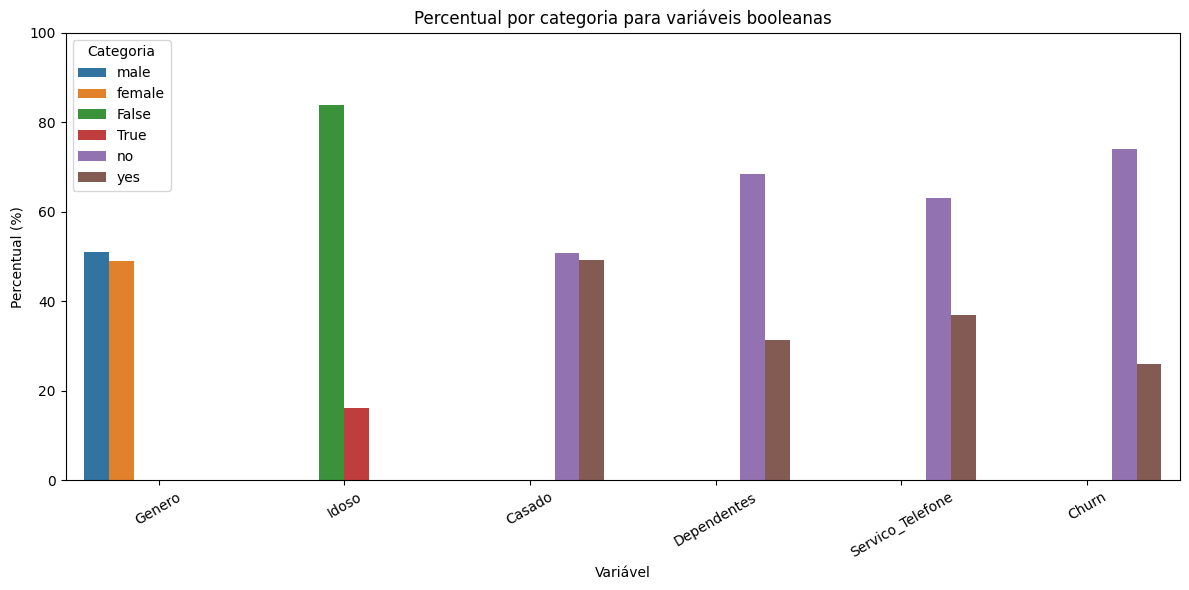

In [12]:
# D) Verifique se os dados das variáveis Booleanas são balanceados ou não

possiveis_booleanas = [col for col in df.columns if df[col].nunique() == 2]

# Criar DataFrame para armazenar os resultados
lista_dados = []

# porcentagem
for coluna in possiveis_booleanas:
    contagem = df[coluna].value_counts(normalize=True) * 100  
    for valor, percentual in contagem.items():
        lista_dados.append({
            'Variável': coluna,
            'Valor': valor,
            'Percentual': round(percentual, 2)
        })

df_plot = pd.DataFrame(lista_dados)

# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Variável', y='Percentual', hue='Valor')

plt.title('Percentual por categoria para variáveis booleanas')
plt.ylabel('Percentual (%)')
plt.xlabel('Variável')
plt.ylim(0, 100)
plt.legend(title='Categoria')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

* O gráfico mostra duas categorias não balanceadas, as categorias idoso e churn.

contagem: 
 False    2086
True      402
Name: Idoso, dtype: int64 

porcentagem: 
 False    83.842444
True     16.157556
Name: Idoso, dtype: float64 



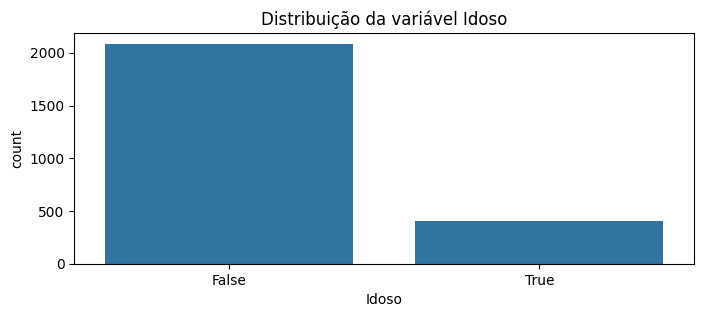

contagem: 
 no     1841
yes     647
Name: Churn, dtype: int64 

porcentagem: 
 no     73.995177
yes    26.004823
Name: Churn, dtype: float64 



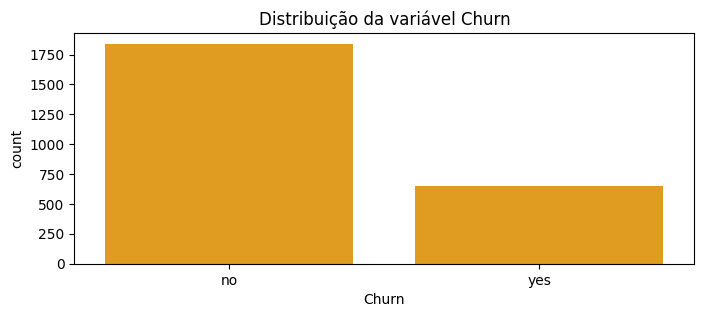

In [13]:
#Variavel  não balanceada: 'Idoso'
contagem = df['Idoso'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

print('contagem: \n',contagem, '\n')
print('porcentagem: \n', porcentagem, '\n')

plt.figure(figsize=(8, 3))
sns.countplot(data = df, x = 'Idoso')
plt.title('Distribuição da variável Idoso')
plt.show()

#Variavel  não balanceada: 'Churn'
contagem = df['Churn'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

print('contagem: \n',contagem, '\n')
print('porcentagem: \n', porcentagem, '\n')

plt.figure(figsize=(8, 3))
sns.countplot(data = df, x = 'Churn', color = 'orange')
plt.title('Distribuição da variável Churn')
plt.show()

-------------

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [14]:
#Seu código aqui
coluna = ['Tempo_como_Cliente', 'Pagamento_Mensal', 'Total_Pago']

Q1 = df[coluna].quantile(0.25)
Q3 = df[coluna].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print('\n Q1:', Q1, '\n', '\n Q3', Q3, '\n', '\n IQR:', IQR)
print("\n Limite inferior:", limite_inferior)
print("\n Limite superior:", limite_superior)

outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

print("\n Colunas analisadas:", coluna)
print("\n Total de outliers:", df.shape[0] - outliers.shape[0])


 Q1: Tempo_como_Cliente      8.0000
Pagamento_Mensal       45.4000
Total_Pago            402.3375
Name: 0.25, dtype: float64 
 
 Q3 Tempo_como_Cliente      56.0000
Pagamento_Mensal        87.7125
Total_Pago            3867.1625
Name: 0.75, dtype: float64 
 
 IQR: Tempo_como_Cliente      48.0000
Pagamento_Mensal        42.3125
Total_Pago            3464.8250
dtype: float64

 Limite inferior: Tempo_como_Cliente     -64.00000
Pagamento_Mensal       -18.06875
Total_Pago           -4794.90000
dtype: float64

 Limite superior: Tempo_como_Cliente     128.00000
Pagamento_Mensal       151.18125
Total_Pago            9064.40000
dtype: float64

 Colunas analisadas: ['Tempo_como_Cliente', 'Pagamento_Mensal', 'Total_Pago']

 Total de outliers: 0


* Não há necessidade de filtrar e tratar outliers, pois o mesmo não se encontra nas colunas analisadas.

-------------

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.

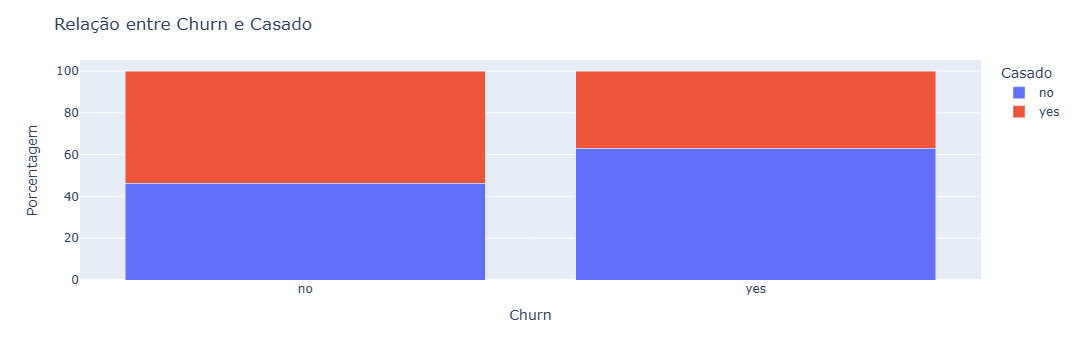

In [15]:
# A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.

# Calcular a porcentagem da categoria Casado
df_grouped = df.groupby(['Churn', 'Casado']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Churn', y='percent', color='Casado', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Casado': 'Casado'})

fig.update_layout(title='Relação entre Churn e Casado',
                  yaxis_title='Porcentagem',
                  legend_title='Casado')
fig.show()

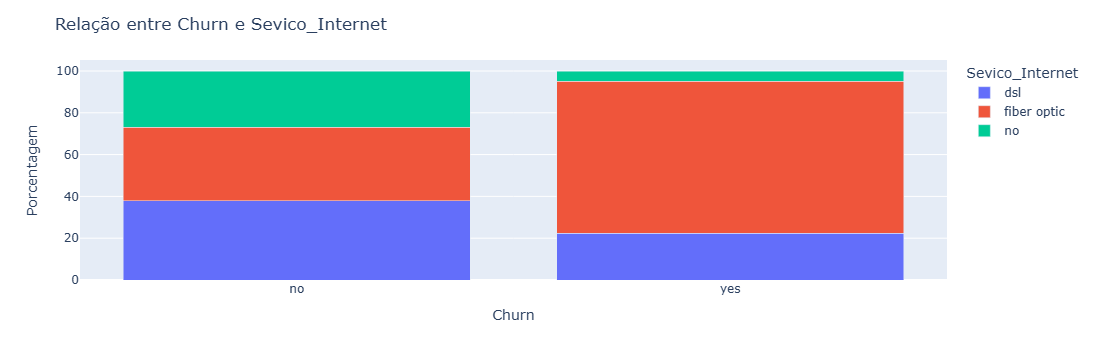

In [16]:
# A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.

# Calcular a porcentagem da categoria Sevico_Internet
df_grouped = df.groupby(['Churn', 'Sevico_Internet']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Churn', y='percent', barmode='stack', color='Sevico_Internet',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Sevico_Internet': 'Sevico_Internet'})

fig.update_layout(title='Relação entre Churn e Sevico_Internet',
                  yaxis_title='Porcentagem',
                  legend_title='Sevico_Internet')
fig.show()

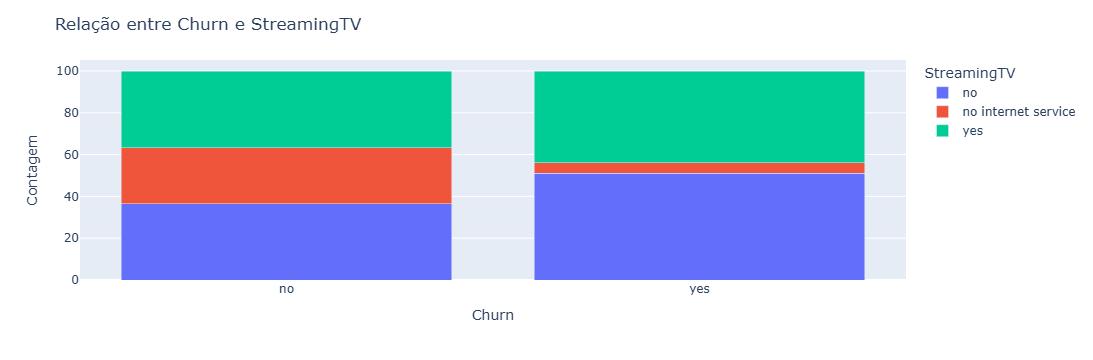

In [17]:
# A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.

# Calcular a porcentagem da categoria StreamingTV
df_grouped = df.groupby(['Churn', 'StreamingTV']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='StreamingTV', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'StreamingTV': 'StreamingTV'})

# Layout
fig.update_layout(title='Relação entre Churn e StreamingTV',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='StreamingTV')
fig.show()

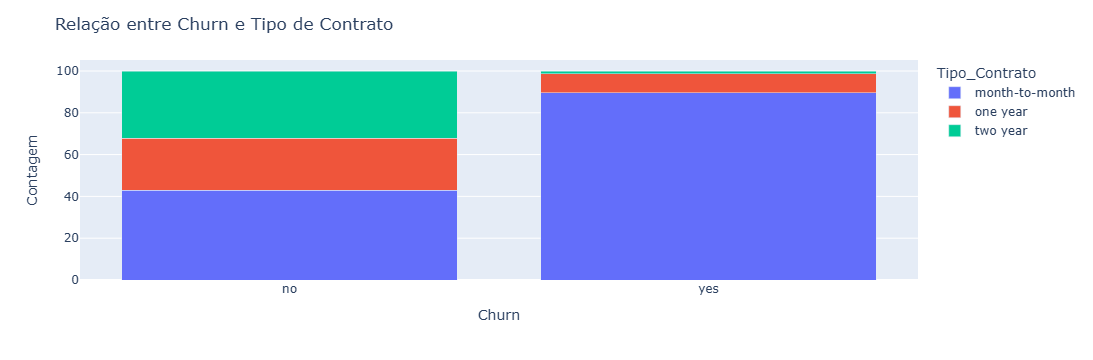

In [18]:
# A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.

# Calcular a porcentagem da categoria Tipo_Contrato
df_grouped = df.groupby(['Churn', 'Tipo_Contrato']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Tipo_Contrato', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Tipo_Contrato': 'Tipo_Contrato'})

# Layout
fig.update_layout(title='Relação entre Churn e Tipo de Contrato',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Tipo_Contrato')
fig.show()

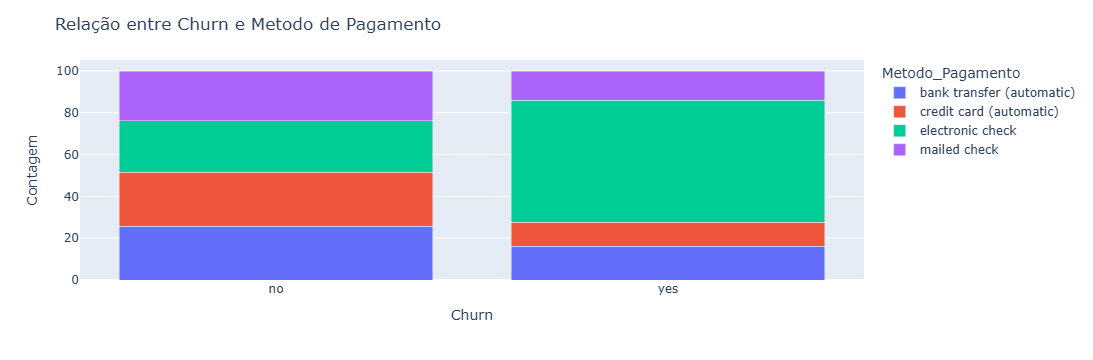

In [19]:
# A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.

# Calcular a porcentagem da categoria Metodo_de_Pagamento
df_grouped = df.groupby(['Churn', 'Metodo_Pagamento']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Metodo_Pagamento', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Metodo_Pagamento': 'Metodo_Pagamento'})

# Layout
fig.update_layout(title='Relação entre Churn e Metodo de Pagamento',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Metodo_Pagamento')
fig.show()

* A coluna 'Casado' pode indicar estabilidade ou dependência no serviço. Pessoas casadas podem ser mais conservadoras nas decisões.

*  Tipo de internet contratada pode estar fortemente ligado à insatisfação (especialmente com fibra, que tende a ter mais churn em alguns casos).

* Serviço de StreamingTV é um adicional. Clientes que contratam mais serviços costumam ser mais engajados, e isso pode afetar o churn.

* O 'Tipo_Contrato' afeta diretamente no Churn, contratos mensais (month-to-month) têm mais taxas de cancelamento do que contratos anuais ou bienais (one year or two year).

* Certos métodos de pagamento podem estar mais associados ao churn (ex: o metodo eletronic chaeck possui 58,42% em relação ao Churn).

--------

B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

* Acredito que as variáveis 'Casado', 'Tipo de internet ', 'StreamingTV', 'Tipo de Contrato' e 'Método de pagamento' são as mais importantes, pois se relacionam diretamente ao perfil e comportamento dos clientes com os serviços contratados.
* Essas variáveis abrangem aspectos tanto contratuais e de consumo quanto caracteristicas pessoais. Portanto, essas variaveis, quando analisadas em conjunto, apresentam uma visão ampla e consistente sobre fatores que podem influenciar o Churn.

-------